In [ ]:
import pandas as pd
from nltk.corpus import PlaintextCorpusReader
import nltk
import numpy as np
from nltk.probability import FreqDist
import math
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator 
from PIL import Image
from scipy.ndimage import gaussian_gradient_magnitude

In [ ]:
df_characters["Nationality"].unique()

array(['No Nationality', 'Temerian', 'Toussaintois', 'Zerrikanian',
       'Crinfrider', 'Redanian', 'Alban', 'Aedirnian', 'Ebbinger',
       'Kovirian', 'Brokilonian', 'Mahakaman', 'Lyrian', 'Nilfgaardian',
       'Kaedwenian', 'Vicovarian', 'Cidarian', 'Creydener', 'Skelliger',
       'Novigradian', 'Cintran', 'temerian', 'Attrean', 'Metinnese',
       'Nazairi'], dtype=object)

In [ ]:
df_characters = pd.read_csv("/work/socialgraph-witcher-analysis/data/cleaned_characters_attr.csv", index_col=0)
df_characters

,pageid,title,Race,Gender,Nationality,Family,Profession
0,8046,Innkeeper,No Race,No Gender,No Nationality,No Family,No Profession
1,5069,The Witcher journal character entries,No Race,No Gender,No Nationality,No Family,No Profession
2,2478,Abigail,Human,Female,Temerian,No Family,Witch
3,53882,Adalbert (soldier),Human,Male,Temerian,No Family,Soldier
4,2210,Adam (Murky Waters),Human,Male,Temerian,No Family,Poet
...,...,...,...,...,...,...,...
831,35362,Yoana,Human,Female,Skelliger,Clan Tordarroch,Armorer
832,51581,Yolar,Human,Male,Skelliger,No Family,Druid
833,43932,Yontek,Human,Male,Temerian,No Family,No Profession
834,76242,Yorg,Human,Male,Skelliger,No Family,No Profession


In [ ]:
def generate_text_corpus(df_characters, overall_attribute, attribute_value):
    """
    Generates the text corpuses for the chosen attribute
    """
    data_root = r"data_all_clean"

    character_list = list(df_characters[df_characters[overall_attribute] == attribute_value]["title"].apply(lambda x: x + '.txt').values)
    wordlists = PlaintextCorpusReader(data_root, character_list)
    text = nltk.Text(wordlists.words())
    return text

    

In [ ]:
def generate_dict_corpuses(df_characters, overall_attribute, number_of_clouds, specific_choices = None):
    """
    Generates dictionary of text_corpuses from the overall attribute.
    """

    attribute_values = []
    
    #Add specific choices first
    if specific_choices is not None:
        attribute_values.extend(specific_choices)

    #Get top represented from the overall attribute and drop unwanted entries
    top_attributes = df_characters[overall_attribute].value_counts()
    top_attributes = top_attributes.drop(index = f"No {overall_attribute}")
    if specific_choices is not None:
        top_attributes = top_attributes.drop(index = specific_choices)   
    attribute_values.extend(list(top_attributes.index))
    attribute_values = attribute_values[:number_of_clouds]
    
    #Generate dictionary of corpuses
    texts_dict = {}
    for attribute in attribute_values:
        attribute_text = generate_text_corpus(df_characters, overall_attribute, attribute)
        texts_dict[attribute] = attribute_text
    
    return texts_dict 

In [ ]:
def generate_word_clouds(texts_dict):
    #Make TC of TF dictionary
    attribute_dict = {}
    for attr in texts_dict.keys():
        term_dict = {}
        for key, value in FreqDist(texts_dict[attr]).items():
            term_dict[key] = value
        attribute_dict[attr] = term_dict
    #Make IDF dictionary

    gathered_texts = list(list(texts_dict.values())[0])
    for text in list(texts_dict.values())[1:]:
        gathered_texts.extend(list(text))

    idf_dict = {}
    for word in np.unique(gathered_texts):
        number_of_documents = 0
        for attr in texts_dict.keys():
            if word in attribute_dict[attr].keys():
                number_of_documents += 1
        idf_dict[word] = math.log10(len(texts_dict.keys())/number_of_documents)

    #Generate Wordclouds
    for attr in attribute_dict.keys():
        wordcloud_string = ''
        for word in attribute_dict[attr].keys():
            word_mod = word + ' ' 
            tf_idf_score = round(attribute_dict[attr][word] * idf_dict[word])
            wordcloud_string += word_mod * tf_idf_score
        make_cloud(wordcloud_string, attr)    


In [ ]:
def make_cloud(wordcloud_string, attr):

    wolf_mask = np.array(Image.open("/work/socialgraph-witcher-analysis/images/wolf_icon.jpg"))

    wc = WordCloud(background_color="black", max_words=2000, mask=wolf_mask, collocations=False, colormap='RdBu')

    wc.generate(wordcloud_string)

    plt.figure(figsize=(10, 10))
    plt.title(f"{attr} Wordcloud")
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
texts_dict = generate_dict_corpuses(df_characters, 'Nationality', 4, ['Skelliger', 'Temerian'])


In [ ]:
texts_dict

{'Skelliger': <Text: skelliger hindarsfjall fiancée 1272 picked way back faroe...>,
 'Temerian': <Text: witch lived house vizima she well liked villager...>,
 'Redanian': <Text: redanian tavern owner errdil cousin despite typically finding...>,
 'Kaedwenian': <Text: kaedweni spy lived residence you could meet first...>}

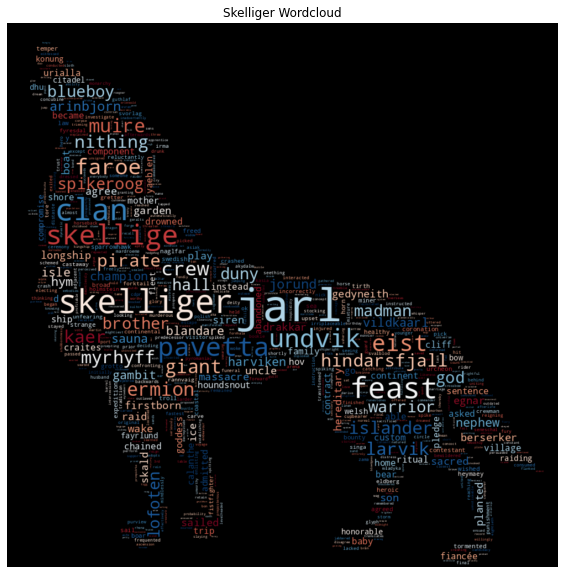

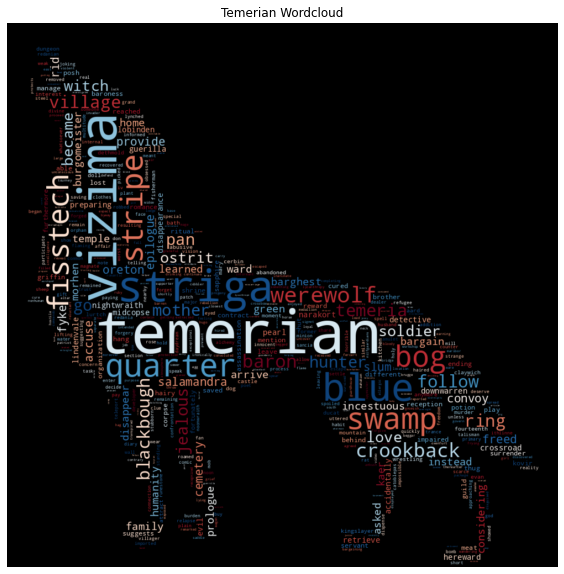

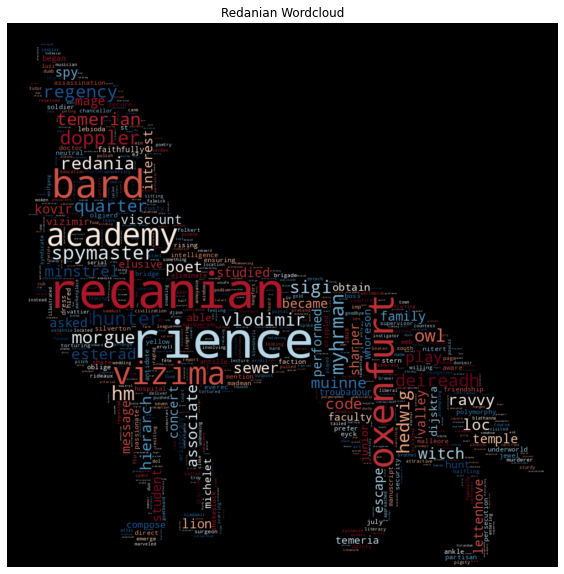

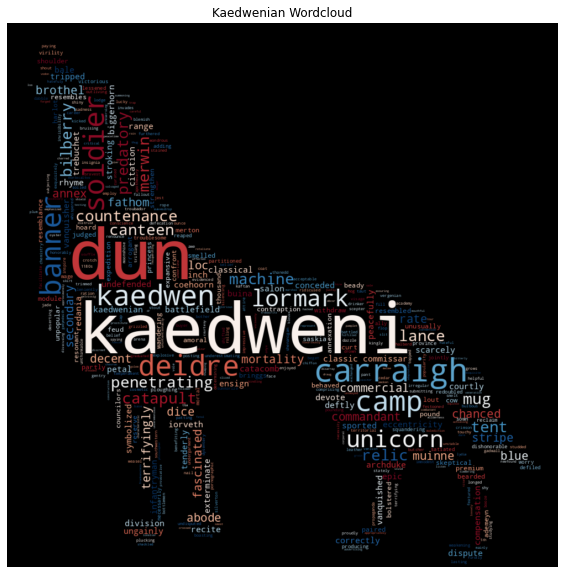

In [ ]:
texts_dict = generate_dict_corpuses(df_characters, 'Nationality', 4, ['Skelliger', 'Temerian'])
generate_word_clouds(texts_dict)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=061c6de9-714b-4aa5-8dca-7fde3082e296' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>